# Lab3 - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset
### Explore Data

In [1]:
import sys
import os

# Add the path to the folder where sklearn is installed
sys.path.append(os.path.abspath("sklearn-env/lib/python3.11/site-packages/"))

from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

dataFrame = datasets.load_diabetes(as_frame=True)
print('Data in pandas DataFrame format: ')
dataFrame['data'].head()

Data in pandas DataFrame format: 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
X, y = dataFrame['data'], dataFrame['target']

# dataFrame.head(int) is a pandas function that returns the first n rows of the dataFrame 
print('All columns:')
print(X.head(3)) 
print('BMI column: ')
print(X['bmi'].head(4))
print('Age column: ')
print(X['age'].head(5))
print('Target column: ')
print(y.head(6))

All columns:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
BMI column: 
0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
Name: bmi, dtype: float64
Age column: 
0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
Name: age, dtype: float64
Target column: 
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
Name: target, dtype: float64


### Train, test model and plot graph 

Training set shape: (412, 1)
Testing set shape: (30, 1)


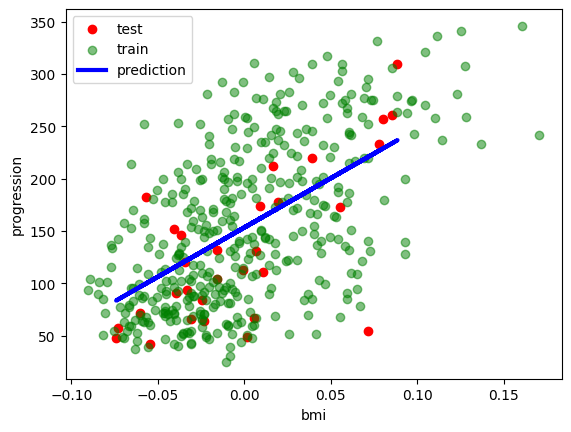

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)

# Use the 3th feature, which is BMI arribute
X = X[:, np.newaxis, 2]

# Split the data into training(70%) and testing(30%) sets
X_train = X[:-30]
X_test = X[-30:]

# Split the data into training(70%) and testing(30%) sets
y_train = y[:-30]
y_test = y[-30:]

# We can check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color="red",label='test')
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='train')
plt.plot(X_test, y_pred, color="blue", linewidth=3, label='prediction')

plt.ylabel("progression")
plt.xlabel("bmi")
plt.legend(fontsize=10)
plt.show()


### Result values

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# The coefficients
print("Coefficients (Slope): ", regr.coef_[0])
# The intercept
print("Intercept: ", regr.intercept_)

# The mean squared error of training set
print("MSE of training set: ", mean_squared_error(y_train, regr.predict(X_train)))
# The mean absolute error of training set
print("MAE of training set: ", mean_absolute_error(y_train, regr.predict(X_train)))
# The mean squared error of test set
print("MSE of test set: ", mean_squared_error(y_test, y_pred))
# The mean absolute error of test set
print("MAE of test set: ", mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Score: ", r2_score(y_test, y_pred))

Coefficients (Slope):  941.4309733293176
Intercept:  153.39713623331644
MSE of training set:  3954.611332145007
MAE of training set:  52.53421217704158
MSE of test set:  3035.0601152912695
MAE of test set:  43.49286787904107
Score:  0.410920728135835


### Conclusion
Based on the indicators, the model's predictive performance is not ideal. The values of MSE and MAE indicate that the model's prediction error is relatively high.